In [1]:

#Import Necessary Libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd  # For playing audio
import speech_recognition as sr
import langid
import math
import soundfile as sf
import noisereduce as nr
import torch
import warnings
warnings.filterwarnings("ignore")

d:\SPEECH_RECOGNITION _PROJECT\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

# Load an audio file
file_path = r"D:\SPEECH_RECOGNITION _PROJECT\BAK.wav"
audio, sr = librosa.load(file_path, sr=16000)


In [3]:
# Play the audio
ipd.Audio(audio, rate=sr)


In [4]:

# basic info
print(f"Sample Rate: {sr} Hz")
print(f"Audio Duration: {len(audio) / sr:.2f} seconds")

Sample Rate: 16000 Hz
Audio Duration: 8.33 seconds


In [5]:

## Extract Acoustic Features (Pitch, Tone, Volume)

In [6]:
def extract_acoustic_features(audio, sr):
    # Pitch (Fundamental Frequency)
    pitches, magnitudes = librosa.piptrack(y=audio, sr=sr)
    pitch_values = pitches.max(axis=0)  # Get the highest pitch at each time step
    pitch_mean = pitch_values[pitch_values > 0].mean()  # Remove zeros and take mean

    # Spectral Centroid (Tone)
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr).mean()

    # RMS Energy (Volume)
    rms_energy = librosa.feature.rms(y=audio).mean()

    return pitch_mean, spectral_centroid, rms_energy

# Get features
pitch, centroid, volume = extract_acoustic_features(audio, sr)

# Display
print(f"\n🔍 Acoustic Analysis Results🔍")
print(f"🎵 Pitch (Hz): {pitch:.2f} Hz")
print(f"🎼 Spectral Centroid (Hz): {centroid:.2f} Hz")
print(f"🔊 Volume (RMS): {volume:.4f}\n")


🔍 Acoustic Analysis Results🔍
🎵 Pitch (Hz): 684.84 Hz
🎼 Spectral Centroid (Hz): 819.93 Hz
🔊 Volume (RMS): 0.0424



In [ ]:
## Visualize Speech Waveform & Spectrogram

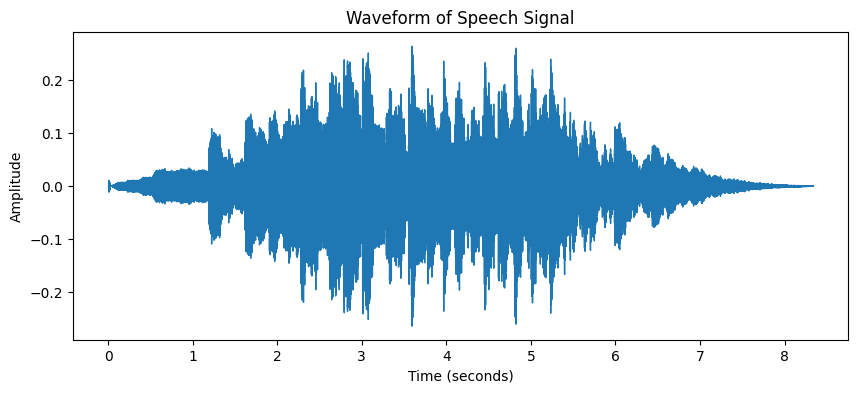

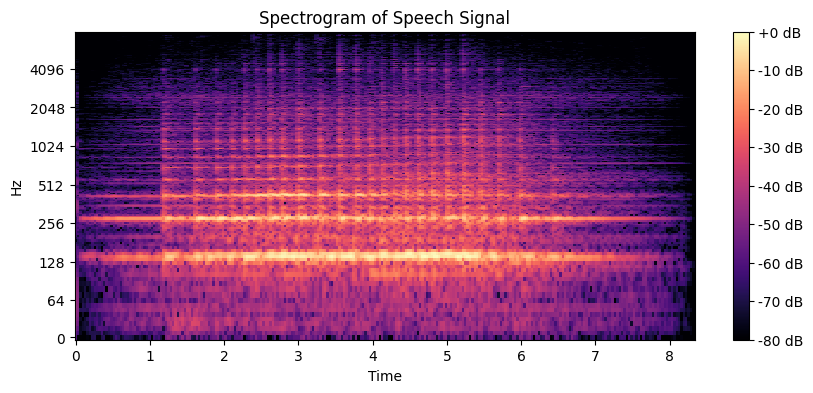

In [7]:
import matplotlib.pyplot as plt
# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform of Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Plot Spectrogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram of Speech Signal")
plt.show()

In [ ]:
## SPEECH RECOGNITION

In [12]:

# Load your audio file
audio_file = r"D:\SPEECH_RECOGNITION _PROJECT\4 (1).wav"

In [13]:
# Play the audio
ipd.Audio(audio_file, rate=sr)

In [14]:
## CONVERT SPEECH TO TEXT

In [16]:

# Convert speech to text
import speech_recognition as sr
recognizer = sr.Recognizer()
audio_file = r"D:\SPEECH_RECOGNITION _PROJECT\4 (1).wav"

with sr.AudioFile(audio_file) as source:
    print("🎤 Processing audio...")
    audio_data = recognizer.record(source)  # Read entire file
    try:
        text = recognizer.recognize_google(audio_data)  # Using Google's ASR
        print("\n📝 **Recognized Text:**")
        print(text)
    except sr.UnknownValueError:
        print("❌ Could not understand audio.")
    except sr.RequestError:
        print("🔌 Could not connect to recognition service.")

🎤 Processing audio...

📝 **Recognized Text:**
have a part in their memories is how to say


In [ ]:
## Identify Spoken Language

In [17]:
language, confidence = langid.classify(text)
print(f"🌍 Detected Language: {language} ")

🌍 Detected Language: en 


In [18]:
## NOISE FILTERING

In [19]:
# 🔹 Load an audio file
noise_path = r"D:\SPEECH_RECOGNITION _PROJECT\crowd-noise-284490 (1).wav" 
audio, sr = librosa.load(noise_path, sr=None)

In [20]:

# Play the audio
ipd.Audio(noise_path, rate=sr)

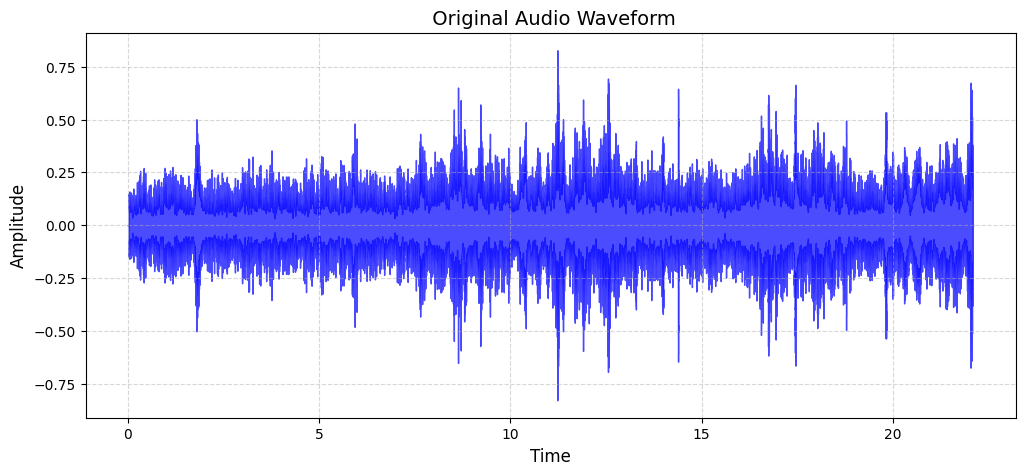

In [21]:
# Plot original audio waveform
plt.figure(figsize=(12, 5))
plt.title(" Original Audio Waveform", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Amplitude", fontsize=12)
librosa.display.waveshow(audio, sr=sr, alpha=0.7, color="blue")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [22]:
#  Apply noise reduction
reduced_audio = nr.reduce_noise(y=audio, sr=sr, prop_decrease=0.8)

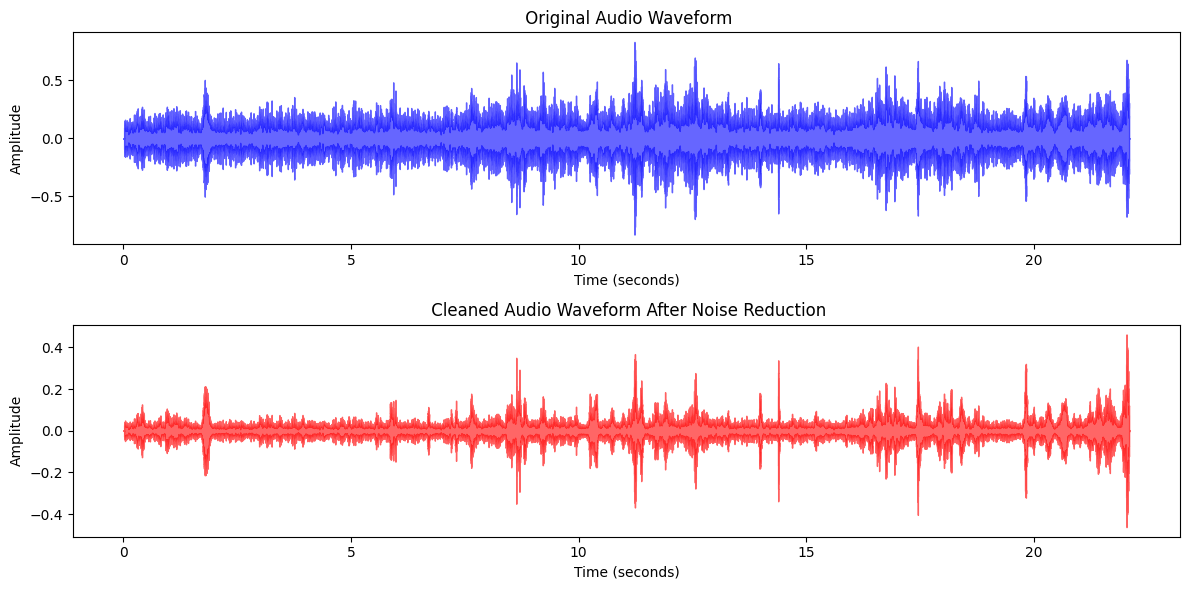

In [27]:
# 🎵 Plot original and cleaned audio waveforms
plt.figure(figsize=(12, 6))

# Original
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color="blue")
plt.title(" Original Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

# Cleaned
plt.subplot(2, 1, 2)
librosa.display.waveshow(reduced_audio, sr=sr, alpha=0.6, color="red")
plt.title(" Cleaned Audio Waveform After Noise Reduction")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

In [28]:
# 💾 Save the denoised audio
#sf.write("denoised_audio.wav", reduced_noise, sr)